# Analyse Exploratoire

### Import des modules

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:

pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#### Chargement des données

In [5]:
#building_consumption = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
building_consumption = pd.read_csv('https://raw.githubusercontent.com/IngridFi70/Projet06/main/2016_Building_Energy_Benchmarking.csv')

In [6]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [7]:
print('lignes et colonnes :', building_consumption.shape)

lignes et colonnes : (3376, 46)


#### Analyse des données manquantes

In [8]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

La colonne **Comments** est vide, elle peut être supprimée.
La colonne **YearsENERGYSTARCertified** est trop peu renseignée, elle peut être supprimée.


In [9]:
# suppression des colonnes Comments et YearsENERGYSTARCertified
print('lignes et colonnes AVANT modif :', building_consumption.shape)
building_consumption_clean=building_consumption.drop(columns=['Comments','YearsENERGYSTARCertified'])
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

lignes et colonnes AVANT modif : (3376, 46)
lignes et colonnes APRES modif : (3376, 44)


In [10]:
building_consumption_clean.describe(include='object')

,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,ComplianceStatus,Outlier
count,3376,3376,3376,3376,3376,3376,3376,3376,3367,3356,1679,596,3376,32
unique,8,24,3362,3354,1,1,3268,19,466,56,50,44,4,2
top,NonResidential,Low-Rise Multifamily,Northgate Plaza,309 South Cloverdale Street,Seattle,WA,1625049001,DOWNTOWN,Multifamily Housing,Multifamily Housing,Parking,Retail Store,Compliant,Low outlier
freq,1460,987,3,4,3376,3376,8,573,866,1667,976,110,3211,23


In [11]:
building_consumption_clean.describe(include='bool')

,DefaultData
count,3376
unique,2
top,False
freq,3263


In [12]:
building_consumption_clean.describe(include='float64')

,ZipCode,Latitude,Longitude,NumberofBuildings,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3360.000000,3376.000000,3376.000000,3368.000000,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,...,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3367.000000,3367.000000
mean,98116.949107,47.624033,-122.334795,1.106888,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,...,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,119.723971,1.175916
std,18.615205,0.047758,0.027203,2.108402,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,...,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,538.832227,1.821452
min,98006.000000,47.499170,-122.414250,0.000000,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,...,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,-0.800000,-0.020000
25%,98105.000000,47.599860,-122.350662,1.000000,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,...,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,9.495000,0.210000
50%,98115.000000,47.618675,-122.332495,1.000000,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,...,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,33.920000,0.610000
75%,98122.000000,47.657115,-122.319407,1.000000,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,...,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,93.940000,1.370000
max,98272.000000,47.733870,-122.220966,111.000000,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,...,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


In [13]:
building_consumption_clean.describe(include='int64')

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s)
count,3376.000000,3376.0,3376.000000,3376.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03
mean,21208.991114,2016.0,4.439277,1968.573164,4.709123,9.483354e+04,8001.526066,8.683201e+04
std,12223.757015,0.0,2.120625,33.088156,5.494465,2.188376e+05,32326.723928,2.079398e+05
min,1.000000,2016.0,1.000000,1900.000000,0.000000,1.128500e+04,0.000000,3.636000e+03
25%,19990.750000,2016.0,3.000000,1948.000000,2.000000,2.848700e+04,0.000000,2.775600e+04
50%,23112.000000,2016.0,4.000000,1975.000000,4.000000,4.417500e+04,0.000000,4.321600e+04
75%,25994.250000,2016.0,7.000000,1997.000000,5.000000,9.099200e+04,0.000000,8.427625e+04
max,50226.000000,2016.0,7.000000,2015.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06


les colonnes City, State et DataYear sont non pertinentes car elles répètent la même information à toutes les lignes.

In [14]:
# suppression des colonnes City et State
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean=building_consumption_clean.drop(columns=['City', 'State','DataYear'])
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

lignes et colonnes AVANT modif : (3376, 44)
lignes et colonnes APRES modif : (3376, 41)


In [15]:
liste_colonnes_total = building_consumption_clean.columns
liste_colonnes_total

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'ZipCode', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [16]:
for colonne in liste_colonnes_total:
    print(building_consumption_clean[colonne].value_counts(dropna=False))
    print("_____________________________________")

OSEBuildingID
1        1
2        1
3        1
5        1
8        1
        ..
50222    1
50223    1
50224    1
50225    1
50226    1
Name: count, Length: 3376, dtype: int64
_____________________________________
BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64
_____________________________________
PrimaryPropertyType
Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Sen

Un bâtiment comporte 99 étages alors que la plus haute tour de Seattle en a 76.

In [17]:
# suppression du bâtiment de 99 étages
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean = building_consumption_clean[building_consumption_clean['NumberofFloors'] != 99]
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

lignes et colonnes AVANT modif : (3376, 41)
lignes et colonnes APRES modif : (3375, 41)


L'étude porte sur les bâtiments non destinés à l'habitation. Il faut donc exclure les lignes concernant des habitations.

In [18]:
# Analyse de la colonne BuildingType
print(building_consumption_clean['BuildingType'].value_counts(dropna=False))

BuildingType
NonResidential          1459
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64


On peut exclure les bâtiments des 4 types suivants : Multifamily LR (1-4), Multifamily MR (5-9), Multifamily HR (10+), Campus

In [19]:
# suppression des 4 types de bâtiments
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean = building_consumption_clean[
    ~building_consumption_clean['BuildingType'].isin([
        'Multifamily LR (1-4)',
        'Multifamily MR (5-9)',
        'Multifamily HR (10+)',
        'Campus'
    ])]
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

lignes et colonnes AVANT modif : (3375, 41)
lignes et colonnes APRES modif : (1643, 41)


Intéressons-nous maintenant à l'utilisation 'première' des bâtiments (PrimaryPropertyType), afin de vérifier qu'ils ne servent pas d'habitation.

In [20]:
# Analyse de la colonne PrimaryPropertyType
print(building_consumption_clean['PrimaryPropertyType'].value_counts(dropna=False))

PrimaryPropertyType
Small- and Mid-Sized Office    292
Other                          243
Warehouse                      187
Large Office                   172
K-12 School                    135
Mixed Use Property             110
Retail Store                    91
Hotel                           76
Worship Facility                70
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      18
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Office                           3
Low-Rise Multifamily             2
Name: count, dtype: int64


Les utilisations suivantes sont à exclure : Hotel, Residence Hall, Senior Care Community, Hospital, Low-Rise Multifamily

In [21]:
# suppression de l'utilisation Hotel
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean = building_consumption_clean[
    ~building_consumption_clean['PrimaryPropertyType'].isin([
        'Hotel',
        'Residence Hall',
        'Senior Care Community',
        'Hospital',
        'Low-Rise Multifamily'
    ])]
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

lignes et colonnes AVANT modif : (1643, 41)
lignes et colonnes APRES modif : (1514, 41)


In [22]:
# Vérification de la colonne PrimaryPropertyType
print(building_consumption_clean['PrimaryPropertyType'].value_counts(dropna=False))

PrimaryPropertyType
Small- and Mid-Sized Office    292
Other                          243
Warehouse                      187
Large Office                   172
K-12 School                    135
Mixed Use Property             110
Retail Store                    91
Worship Facility                70
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      18
Refrigerated Warehouse          12
Restaurant                      11
Laboratory                      10
Office                           3
Name: count, dtype: int64


Intéressons-nous maintenant à l'utilisation principale, secondaire et tertiaire des bâtiments, afin de vérifier qu'ils ne servent pas d'habitation.

In [23]:
# Analyse de la colonne LargestPropertyUseType
print(building_consumption_clean['LargestPropertyUseType'].value_counts(dropna=False))

LargestPropertyUseType
Office                                                  495
Non-Refrigerated Warehouse                              199
K-12 School                                             135
Retail Store                                             97
Other                                                    93
Worship Facility                                         70
Distribution Center                                      54
Supermarket/Grocery Store                                41
Medical Office                                           41
Other - Recreation                                       31
Parking                                                  29
Self-Storage Facility                                    27
Other - Entertainment/Public Assembly                    21
College/University                                       18
Laboratory                                               13
Refrigerated Warehouse                                   12
Restaurant       

Les 11 utilisations suivantes sont à exclure : 
Hotel, Residence Hall/Dormitory , Senior Care Community , Multifamily Housing, 
Hospital (General Medical & Surgical), Other - Lodging/Residential, Urgent Care/Clinic/Other Outpatient, 
Other/Specialty Hospital , Prison/Incarceration , Lifestyle Center , Residential Care Facility

In [24]:
# suppression des 11 catégories d'utilisation
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)

liste_exclude = ['Hotel',
                 'Residence Hall/Dormitory',
                 'Senior Care Community' ,
                 'Multifamily Housing',
                 'Hospital (General Medical & Surgical)',
                 'Other - Lodging/Residential',
                 'Urgent Care/Clinic/Other Outpatient',
                 'Other/Specialty Hospital' ,
                 'Prison/Incarceration' ,
                 'Lifestyle Center' ,
                 'Residential Care Facility']

building_consumption_clean = building_consumption_clean[~building_consumption_clean['LargestPropertyUseType'].isin(liste_exclude)]
building_consumption_clean = building_consumption_clean[~building_consumption_clean['SecondLargestPropertyUseType'].isin(liste_exclude)]
building_consumption_clean = building_consumption_clean[~building_consumption_clean['ThirdLargestPropertyUseType'].isin(liste_exclude)]

print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

lignes et colonnes AVANT modif : (1514, 41)
lignes et colonnes APRES modif : (1457, 41)


In [25]:
# Vérification des la colonnes LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType
print(building_consumption_clean['LargestPropertyUseType'].value_counts(dropna=False))
print(building_consumption_clean['SecondLargestPropertyUseType'].value_counts(dropna=False))
print(building_consumption_clean['ThirdLargestPropertyUseType'].value_counts(dropna=False))

LargestPropertyUseType
Office                                                  480
Non-Refrigerated Warehouse                              197
K-12 School                                             135
Retail Store                                             93
Other                                                    92
Worship Facility                                         70
Distribution Center                                      54
Supermarket/Grocery Store                                41
Medical Office                                           40
Other - Recreation                                       31
Self-Storage Facility                                    27
Parking                                                  27
Other - Entertainment/Public Assembly                    20
College/University                                       18
Laboratory                                               13
Refrigerated Warehouse                                   12
Restaurant       

In [26]:
building_consumption_clean.describe(include='int64')

,OSEBuildingID,CouncilDistrictCode,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s)
count,1457.000000,1457.000000,1457.000000,1457.000000,1.457000e+03,1457.000000,1.457000e+03
mean,16163.903226,4.271105,1961.438572,3.769389,1.041903e+05,12470.326012,9.171993e+04
std,13422.046629,2.205437,32.099292,6.051888,1.771422e+05,42769.440775,1.528499e+05
min,9.000000,1.000000,1900.000000,0.000000,1.229400e+04,0.000000,1.092500e+04
25%,608.000000,2.000000,1930.000000,1.000000,2.880000e+04,0.000000,2.783800e+04
50%,21179.000000,4.000000,1965.000000,2.000000,4.656000e+04,0.000000,4.500000e+04
75%,24537.000000,7.000000,1988.000000,4.000000,9.630000e+04,0.000000,8.877400e+04
max,50226.000000,7.000000,2015.000000,76.000000,1.952220e+06,512608.000000,1.632820e+06


In [27]:
print(building_consumption_clean.describe(include='float64'))

            ZipCode     Latitude    Longitude  NumberofBuildings  \
count   1444.000000  1457.000000  1457.000000        1455.000000   
mean   98117.423823    47.614678  -122.333284           1.009622   
std       18.130019     0.049202     0.025112           0.411213   
min    98006.000000    47.499170  -122.411820           0.000000   
25%    98105.000000    47.580820  -122.343580           1.000000   
50%    98115.000000    47.611650  -122.332970           1.000000   
75%    98125.000000    47.649090  -122.321850           1.000000   
max    98199.000000    47.733870  -122.258640           8.000000   

       LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
count               1.452000e+03                       746.000000   
mean                8.462992e+04                     33437.369031   
std                 1.404425e+05                     61891.075126   
min                 5.656000e+03                         0.000000   
25%                 2.501575e+04          

#### Analyse des sources d'énergie

Le dataset comporte des données de consommation énergétiques ajustées sur 30 ans de conditions météo moyennes. Nous pouvons les exclure puisque nous avons des données pour une seule année, ce qui signifie que les consommations de chaque bâtiment sont calculées sur la même base : la météo de 2016.

In [28]:
# Suppression des colonnes de type WN (Weather Normalized)
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean=building_consumption_clean.drop(columns=['SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)'])
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

lignes et colonnes AVANT modif : (1457, 41)
lignes et colonnes APRES modif : (1457, 38)


Les consommations d'électricité et de gaz sont les deux seules données qui ne sont pas exprimées qu'en kBtu (kilo British thermal units). Les autres unités de mesure ne sont pas pertinentes puisqu'on ne peut les comparer à aucune autre donnée de consommation.

In [29]:
# Suppression des colonnes exprimant des consommations énergétiques autrement qu'en kBtu
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean=building_consumption_clean.drop(columns=['Electricity(kWh)', 'NaturalGas(therms)'])
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

lignes et colonnes AVANT modif : (1457, 38)
lignes et colonnes APRES modif : (1457, 36)


Analysons les données énergétiques afin d'exclure les valeurs aberrantes.

In [30]:
building_consumption_clean.describe()

,OSEBuildingID,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1457.000000,1444.000000,1457.000000,1457.000000,1457.000000,1457.000000,1455.000000,1457.000000,1.457000e+03,1457.000000,...,294.000000,954.000000,1454.000000,1455.000000,1.455000e+03,1.455000e+03,1.455000e+03,1.455000e+03,1455.000000,1455.000000
mean,16163.903226,98117.423823,4.271105,47.614678,-122.333284,1961.438572,1.009622,3.769389,1.041903e+05,12470.326012,...,12425.617002,66.149895,69.460316,172.624674,6.135036e+06,1.880138e+05,4.717015e+06,1.196026e+06,110.917533,1.444124
std,13422.046629,18.130019,2.205437,0.049202,0.025112,32.099292,0.411213,6.051888,1.771422e+05,42769.440775,...,26876.879531,28.446514,74.524891,189.939680,1.216102e+07,1.343540e+06,1.111917e+07,2.512374e+06,197.944073,2.111024
min,9.000000,98006.000000,1.000000,47.499170,-122.411820,1900.000000,0.000000,0.000000,1.229400e+04,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,-0.020000
25%,608.000000,98105.000000,2.000000,47.580820,-122.343580,1930.000000,1.000000,1.000000,2.880000e+04,0.000000,...,2518.500000,50.000000,31.925000,72.800003,1.144902e+06,0.000000e+00,6.808110e+05,0.000000e+00,18.130000,0.330000
50%,21179.000000,98115.000000,4.000000,47.611650,-122.332970,1965.000000,1.000000,2.000000,4.656000e+04,0.000000,...,5615.500000,75.000000,48.699999,124.000000,2.301044e+06,0.000000e+00,1.486130e+06,3.823200e+05,44.350000,0.770000
75%,24537.000000,98125.000000,7.000000,47.649090,-122.321850,1988.000000,1.000000,4.000000,9.630000e+04,0.000000,...,11963.000000,89.000000,75.074999,195.699997,6.090536e+06,0.000000e+00,4.467414e+06,1.200302e+06,117.740000,1.600000
max,50226.000000,98199.000000,7.000000,47.733870,-122.258640,2015.000000,8.000000,76.000000,1.952220e+06,512608.000000,...,303910.000000,100.000000,834.400024,2620.000000,2.746822e+08,3.103019e+07,2.745325e+08,3.468533e+07,2549.470000,25.710000


Les bâtiments avec des consommations négatives d'électricité sont à exclure.

In [31]:
# suppression des bâtiments avec conso électrique négative
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean = building_consumption_clean[building_consumption_clean['Electricity(kBtu)'] >= 0]
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

lignes et colonnes AVANT modif : (1457, 36)
lignes et colonnes APRES modif : (1454, 36)


Puisque les consommations par type d'énergie sont une composante de l'énergie consommée totale (c'est-à-dire la cible), nous devons les prendre en compte en proportion de la consommation totale afin de calculer l'incidence de chaque type d'énergie sur la consommation totale. Les consommations par type d'énergie peuvent ensuite être exclues du dataset.

In [32]:
# Ajout des ratios par source d'énergie dans la consommation totale d'énergie puis suppression des consommations par énergie
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean['ratio_steam'] = building_consumption_clean['SteamUse(kBtu)'] / building_consumption_clean['SiteEnergyUse(kBtu)']
building_consumption_clean['ratio_electricity'] = building_consumption_clean['Electricity(kBtu)'] / building_consumption_clean['SiteEnergyUse(kBtu)']
building_consumption_clean['ratio_gas'] = building_consumption_clean['NaturalGas(kBtu)'] / building_consumption_clean['SiteEnergyUse(kBtu)']
building_consumption_clean=building_consumption_clean.drop(columns=['SteamUse(kBtu)', 'Electricity(kBtu)','NaturalGas(kBtu)'])
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

lignes et colonnes AVANT modif : (1454, 36)
lignes et colonnes APRES modif : (1454, 36)


#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

#### Choix des cibles

La cible pour la prédiction de la consommation totale d'énergie sera : **SiteEnergyUse(kBtu)**

La cible pour la prédiction des émissions de CO2 sera : **TotalGHGEmissions**

### Recherche d'outliers

Le dataset comporte une colonne Outlier, vérifions quel outlier peuvent être écartés.

In [33]:
# Analyse des bâtiments marqués comme outliers
check_outliers=building_consumption_clean[building_consumption_clean['Outlier'].notna()]
check_normal = building_consumption_clean[building_consumption_clean['Outlier'].isna()]
check_normal.describe()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,OSEBuildingID,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ratio_steam,ratio_electricity,ratio_gas
count,1439.000000,1426.00000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1.439000e+03,1439.000000,...,292.000000,943.000000,1438.000000,1439.000000,1.439000e+03,1439.000000,1439.000000,1423.000000,1430.000000,1427.000000
mean,16119.776233,98117.47756,4.273106,47.614802,-122.333329,1961.646282,1.006949,3.780403,1.047666e+05,12578.766505,...,12408.744516,65.860021,69.724131,173.106393,6.146276e+06,111.721786,1.456838,0.017992,inf,inf
std,13408.790765,18.18856,2.205643,0.049322,0.025141,31.993056,0.399870,6.085540,1.781005e+05,43007.292717,...,26955.273196,28.317834,74.168390,188.147031,1.216655e+07,198.641326,2.118387,0.085176,NaN,NaN
min,9.000000,98006.00000,1.000000,47.499170,-122.411820,1900.000000,0.000000,0.000000,1.229400e+04,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,605.500000,98105.00000,2.000000,47.580670,-122.343710,1931.000000,1.000000,1.000000,2.880000e+04,0.000000,...,2500.000000,49.000000,32.349999,74.099998,1.162362e+06,18.750000,0.330000,0.000000,0.502778,0.000000
50%,21177.000000,98115.00000,4.000000,47.611790,-122.332940,1965.000000,1.000000,2.000000,4.658000e+04,0.000000,...,5615.500000,74.000000,49.199999,124.699997,2.332996e+06,45.330000,0.780000,0.000000,0.737451,0.216926
75%,24533.000000,98125.00000,7.000000,47.649125,-122.321945,1988.000000,1.000000,4.000000,9.739400e+04,0.000000,...,11913.000000,89.000000,75.199997,196.099998,6.123036e+06,119.030000,1.625000,0.000000,0.999999,0.478050
max,50226.000000,98199.00000,7.000000,47.733870,-122.258640,2015.000000,8.000000,76.000000,1.952220e+06,512608.000000,...,303910.000000,100.000000,834.400024,2620.000000,2.746822e+08,2549.470000,25.710000,0.766987,inf,inf


In [34]:
check_outliers.describe()

,OSEBuildingID,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ratio_steam,ratio_electricity,ratio_gas
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,2.000000,10.000000,15.000000,15.000000,1.500000e+01,15.000000,15.00000,15.0,15.000000,15.000000
mean,18490.666667,98113.733333,4.000000,47.600381,-122.331758,1942.800000,1.266667,2.666667,60675.466667,4561.333333,...,14889.000000,90.100000,48.326667,137.786667,5.442825e+06,41.210667,0.32200,0.0,0.805773,0.139183
std,12522.762114,12.881142,2.329929,0.038916,0.024493,35.743531,1.032796,1.799471,50025.782841,12438.448380,...,14299.113329,31.306549,104.999814,327.787401,1.233988e+07,101.057458,0.61262,0.0,0.295764,0.234160
min,350.000000,98101.000000,1.000000,47.517090,-122.377970,1900.000000,1.000000,1.000000,20039.000000,0.000000,...,4778.000000,1.000000,0.700000,2.100000,1.680890e+04,0.120000,0.00000,0.0,0.143692,0.000000
25%,10335.500000,98104.000000,2.000000,47.585400,-122.339700,1910.000000,1.000000,1.500000,25921.000000,0.000000,...,9833.500000,100.000000,2.700000,6.100000,8.660605e+04,0.600000,0.02000,0.0,0.573526,0.000000
50%,21474.000000,98108.000000,3.000000,47.606420,-122.334680,1947.000000,1.000000,2.000000,39900.000000,0.000000,...,14889.000000,100.000000,5.200000,14.300000,1.613634e+05,2.220000,0.05000,0.0,0.999997,0.000000
75%,24632.000000,98124.000000,7.000000,47.616770,-122.317190,1964.500000,1.000000,3.000000,63606.000000,0.000000,...,19944.500000,100.000000,10.950000,24.500000,3.752172e+05,10.065000,0.22500,0.0,1.000002,0.231655
max,43948.000000,98134.000000,7.000000,47.661780,-122.278800,2001.000000,5.000000,7.000000,172842.000000,42500.000000,...,25000.000000,100.000000,311.700012,978.900024,4.139950e+07,362.660000,2.10000,0.0,1.000011,0.663125


In [35]:
check_outliers.head(100)

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,ratio_steam,ratio_electricity,ratio_gas
226,350,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,98101.0,0942000045,7,DOWNTOWN,47.60642,...,909.599976,4.139950e+07,False,Non-Compliant,High outlier,362.66,2.10,0.0,0.961235,0.038764
384,539,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,98105.0,5335200380,4,NORTHEAST,47.66178,...,14.300000,3.189628e+05,False,Non-Compliant,Low outlier,2.22,0.03,0.0,1.000001,0.000000
448,608,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,98104.0,5247800200,2,DOWNTOWN,47.59878,...,28.000000,1.119592e+07,False,Non-Compliant,Low outlier,29.43,0.19,0.0,0.143692,0.030641
517,704,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,98119.0,7666202110,7,MAGNOLIA / QUEEN ANNE,47.62235,...,978.900024,2.713719e+07,False,Non-Compliant,High outlier,189.18,1.46,0.0,1.000000,0.000000
839,19967,SPS-District K-12,K-12 School,Queen Anne Gym,1431 2nd Ave N,98109.0,0811000005,7,MAGNOLIA / QUEEN ANNE,47.63203,...,27.000000,4.314717e+05,True,Error - Correct Default Data,Low outlier,11.54,0.32,0.0,0.571597,0.428404
1045,20617,NonResidential,Retail Store,Seattle Habitat Store,21 S Nevada St,98134.0,1824049074,2,GREATER DUWAMISH,47.56535,...,6.400000,1.454688e+05,True,Error - Correct Default Data,Low outlier,5.46,0.14,0.0,0.336876,0.663125
1229,21315,NonResidential,Small- and Mid-Sized Office,1518 Fifith Ave,1520 Fifth Ave,98101.0,1975700135,7,DOWNTOWN,47.61119,...,3.000000,2.410550e+04,False,Non-Compliant,Low outlier,0.17,0.00,0.0,0.999979,0.000000
1295,21474,NonResidential,Other,The Lusty Lady,1315 1st Ave,98101.0,1976200060,7,DOWNTOWN,47.60711,...,5.800000,4.429350e+04,False,Non-Compliant,Low outlier,0.31,0.01,0.0,1.000011,0.000000
1611,22830,NonResidential,Worship Facility,Freedom Church,9601 35th Ave,98126.0,2858600090,1,SOUTHWEST,47.51709,...,13.300000,1.008417e+05,False,Non-Compliant,Low outlier,0.70,0.03,0.0,1.000003,0.000000
1945,23912,NonResidential,Small- and Mid-Sized Office,1416 S Jackson,1416 South Jackson Street,98133.0,3320000165,3,CENTRAL,47.59973,...,13.200000,2.848573e+05,False,Non-Compliant,Low outlier,8.59,0.19,0.0,0.497737,0.502262


Pas d'abbération visible.

In [36]:
building_consumption_clean['SiteEnergyUse(kBtu)'].value_counts()

SiteEnergyUse(kBtu)
0.0           16
18588860.0     1
9956396.0      1
7606084.5      1
44984468.0     1
              ..
13998638.0     1
13239050.0     1
3605855.5      1
4420650.5      1
12086616.0     1
Name: count, Length: 1439, dtype: int64

In [37]:
building_consumption_clean['SiteEnergyUse(kBtu)'].min()

np.float64(0.0)

In [38]:
building_consumption_clean['SiteEnergyUse(kBtu)'].describe()

count    1.454000e+03
mean     6.139019e+06
std      1.216425e+07
min      0.000000e+00
25%      1.146202e+06
50%      2.302388e+06
75%      6.104418e+06
max      2.746822e+08
Name: SiteEnergyUse(kBtu), dtype: float64

La consommation d'énergie des bâtiments semble très disparate. On peut déjà exclure les bâtiments sans consommation énergétique.

In [39]:
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean=building_consumption_clean[building_consumption_clean['SiteEnergyUse(kBtu)']!=(0)]
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

lignes et colonnes AVANT modif : (1454, 36)
lignes et colonnes APRES modif : (1438, 36)


#### Recherche d'outliers avec la méthode de l'IQR

In [40]:
data = building_consumption_clean['SiteEnergyUse(kBtu)']

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

low_bound = Q1 - 1.5 * IQR
up_bound = Q3 + 1.5 * IQR

# Filtrer les données sans outliers
data_no_outliers_IQR = building_consumption_clean[
    (data >= low_bound) & (data <= up_bound)
]
print(f"il reste {len(data_no_outliers_IQR)} bâtiments sur {len(building_consumption_clean)} en excluant les outliers avec la méthode IQR")

il reste 1271 bâtiments sur 1438 en excluant les outliers avec la méthode IQR


#### Recherche d'outliers avec la méthode du z-score

In [52]:
# Recherche d'outliers la consommation totale avec la méthode du z-score
df = building_consumption_clean
EU = 'SiteEnergyUse(kBtu)'
df['z_scoreEU'] = (df[EU] - df[EU].mean()) / df[EU].std()
data_no_outliers_zscore = building_consumption_clean[
    (df['z_scoreEU']< 3)
]
print(f"il reste {len(data_no_outliers_zscore)} bâtiments sur {len(building_consumption_clean)} en excluant les outliers avec la méthode z-score")


il reste 1368 bâtiments sur 1408 en excluant les outliers avec la méthode z-score


La méthode z-score étant moins restrictive, on la choisit pour exclure les outliners.

In [53]:
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean = data_no_outliers_zscore
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

lignes et colonnes AVANT modif : (1408, 37)
lignes et colonnes APRES modif : (1368, 37)


# DRAFTS

La distribution par tranche de consommation peut aider à mettre en évidence des outliers.

In [ ]:
sns.kdeplot(building_consumption_clean['SiteEnergyUse(kBtu)'], shade=False)
plt.title("Estimation de la densité (KDE)")
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(building_consumption_clean['SiteEnergyUse(kBtu)'], bins=38)
plt.title("Histogramme de la donnée")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.boxplot(x=building_consumption_clean['SiteEnergyUse(kBtu)'])
plt.title("Boxplot de la donnée")
plt.show()

In [ ]:
# Création d'une colonne catégorielle à partir de la consommation totale d'énergie
building_consumption_clean['cat_EU'] = pd.cut(building_consumption_clean['SiteEnergyUse(kBtu)'], bins=12, include_lowest=True, precision=0)

# Comptage du nombre de valeurs dans chaque catégorie
count_cat_EU = building_consumption_clean['cat_EU'].value_counts().sort_index()

print(count_cat_EU)

In [ ]:
# Représentation graphique
plt.figure(figsize=(12, 8))
count_cat_EU.plot(kind='line')
plt.title("Répartition par catégories créées")
plt.xlabel("Catégories (intervalles)")
plt.ylabel("Nombre de valeurs")
plt.xticks(rotation=90)
plt.show()

La consommation devient très atypique à partir de 247215668.09. On peut exclure les bâtiments à partir de cette EU.

In [ ]:
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean = building_consumption_clean[
    building_consumption_clean['SiteEnergyUse(kBtu)'] < 247215668.09]
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

In [ ]:
# Création d'une colonne catégorielle à partir de la consommation totale d'énergie
building_consumption_clean['cat_EU'] = pd.cut(building_consumption_clean['SiteEnergyUse(kBtu)'], bins=5)

# Comptage du nombre de valeurs dans chaque catégorie
count_cat_EU = building_consumption_clean['cat_EU'].value_counts().sort_index()

count_cat_EU

In [ ]:
# Représentation graphique
count_cat_EU.plot(kind='bar')
plt.title("Répartition par catégories créées")
plt.xlabel("Catégories (intervalles)")
plt.ylabel("Nombre de valeurs")
plt.show()

In [ ]:
building_consumption_clean.columns

In [ ]:
building_consumption_clean['SiteEnergyUse(kBtu)'].describe()

Regardons la distribution par EUI

In [ ]:
building_consumption_clean['SiteEUI(kBtu/sf)'].describe()

In [ ]:
# Création d'une colonne catégorielle à partir de la consommation énergétique par sf
building_consumption_clean['cat_EUI'] = pd.cut(building_consumption_clean['SiteEUI(kBtu/sf)'], bins=10)

# Comptage du nombre de valeurs dans chaque catégorie
count_cat_EUI = building_consumption_clean['cat_EUI'].value_counts().sort_index()

count_cat_EUI

In [ ]:
# Représentation graphique
count_cat_EUI.plot(kind='bar')
plt.title("Répartition par catégories créées")
plt.xlabel("Catégories (intervalles)")
plt.ylabel("Nombre de valeurs")
plt.show()

Ici encore, les valeurs deviennent atypiques à partir de 667,66. On peut exclure les bâtiments à partir de cette EUI.

In [ ]:
print('lignes et colonnes AVANT modif :', building_consumption_clean.shape)
building_consumption_clean= building_consumption_clean[
    building_consumption_clean['SiteEUI(kBtu/sf)']< 667.66 ]
print('lignes et colonnes APRES modif :', building_consumption_clean.shape)

Analysons la distribution des surfaces des bâtiments

In [ ]:
building_consumption_clean['PropertyGFABuilding(s)'].describe()

In [ ]:
# Création d'une colonne catégorielle à partir de la surface bâtiment
building_consumption_clean['cat_sfb'] = pd.cut(building_consumption_clean['PropertyGFABuilding(s)'], bins=2, include_lowest=True)

# Comptage du nombre de valeurs dans chaque catégorie
count_cat_sfb = building_consumption_clean['cat_sfb'].value_counts().sort_index()

count_cat_sfb



In [ ]:
# Représentation graphique
count_cat_sfb.plot(kind='bar')
plt.title("Répartition par catégories créées")
plt.xlabel("Catégories (intervalles)")
plt.ylabel("Nombre de valeurs")
plt.show()

Analysons la distribution des surfaces totales

In [ ]:
building_consumption_clean['PropertyGFATotal'].describe()


In [ ]:
# Création d'une colonne catégorielle à partir de la surface totale
building_consumption_clean['cat_sf'] = pd.cut(building_consumption_clean['PropertyGFATotal'], bins=2)

# Comptage du nombre de valeurs dans chaque catégorie
count_cat_sf = building_consumption_clean['cat_sf'].value_counts().sort_index()

count_cat_sf


In [ ]:
# Représentation graphique
count_cat_sf.plot(kind='bar')
plt.title("Répartition par catégories créées")
plt.xlabel("Catégories (intervalles)")
plt.ylabel("Nombre de valeurs")
plt.show()

# Recherche de corrélation entre les données

In [43]:
building_consumption_clean.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'ZipCode', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'DefaultData',
       'ComplianceStatus', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'ratio_steam', 'ratio_electricity',
       'ratio_gas', 'z_scoreEU'],
      dtype='object')

In [44]:
# Liste des données qualitatives
liste_quali=('BuildingType', 'PrimaryPropertyType', 'Neighborhood', 
       'YearBuilt', 'LargestPropertyUseType')
liste_quali

('BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'YearBuilt',
 'LargestPropertyUseType')

In [ ]:
# Liste des données quantitatives
liste_quanti=('Latitude', 'Longitude','NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ENERGYSTARScore', 
       'SourceEUI(kBtu/sf)', 'ratio_steam',
       'ratio_electricity', 'ratio_gas')
liste_quanti

('Latitude',
 'Longitude',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'ratio_steam',
 'ratio_electricity',
 'ratio_gas')

Analysons les corrélations entre la consommation et les données qualitatives.

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

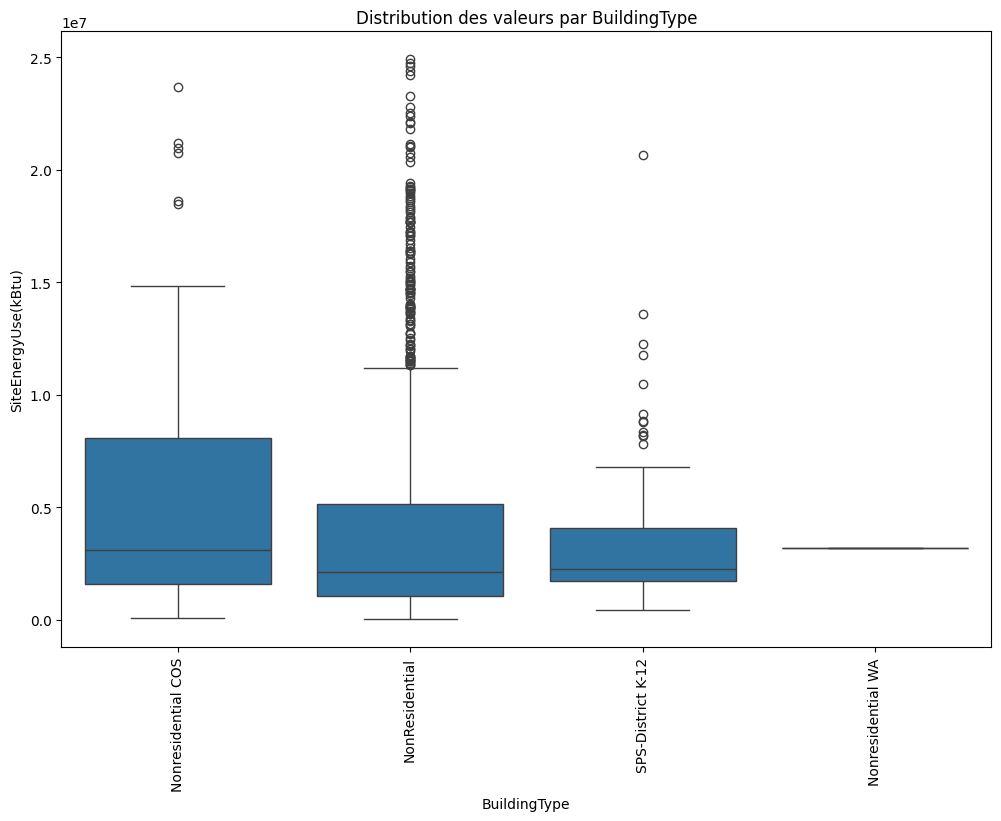

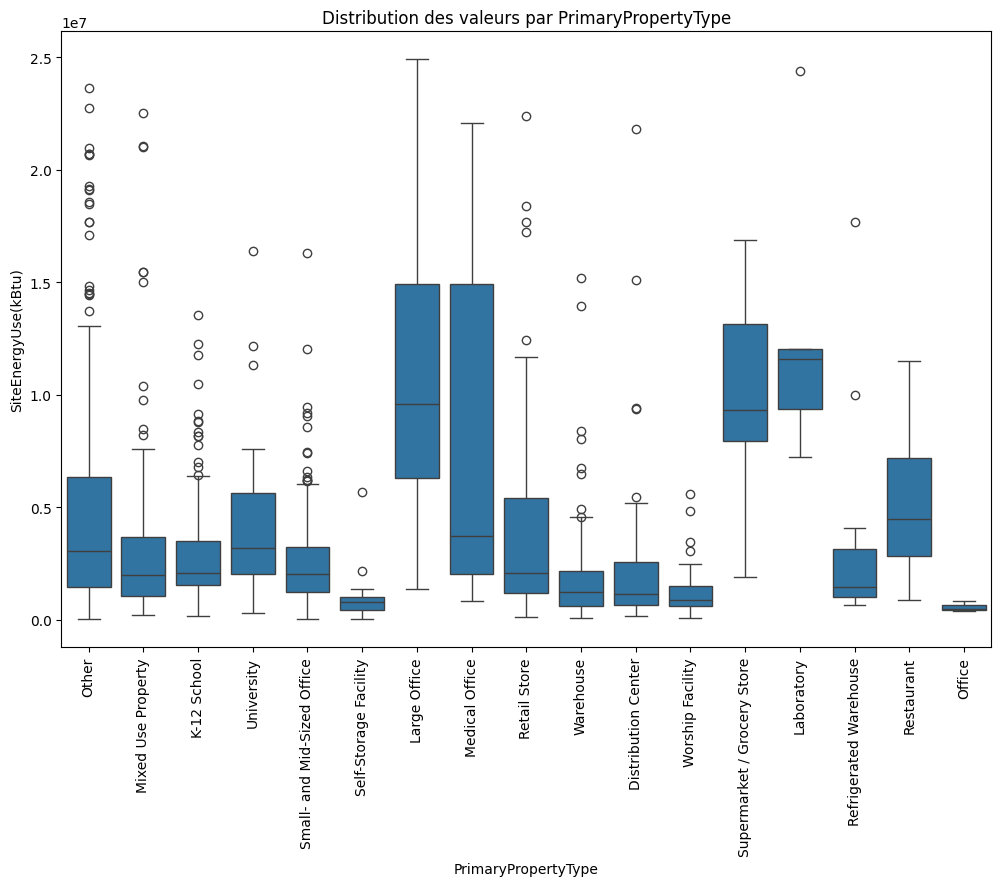

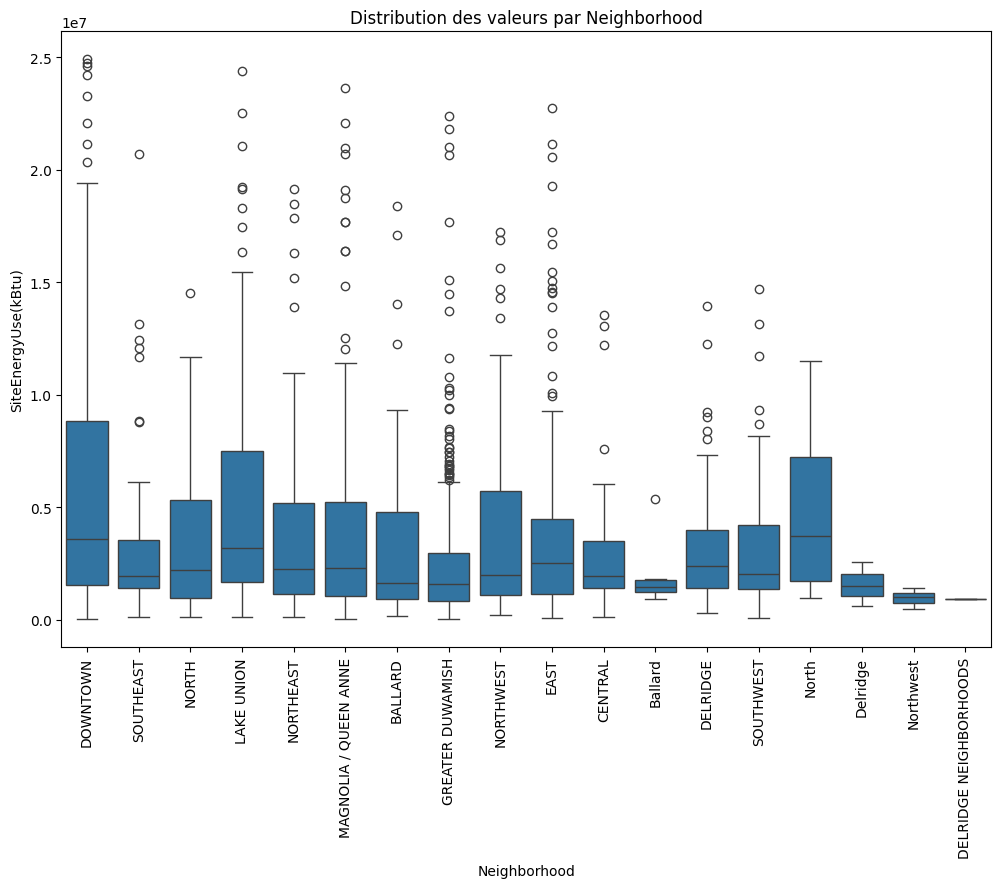

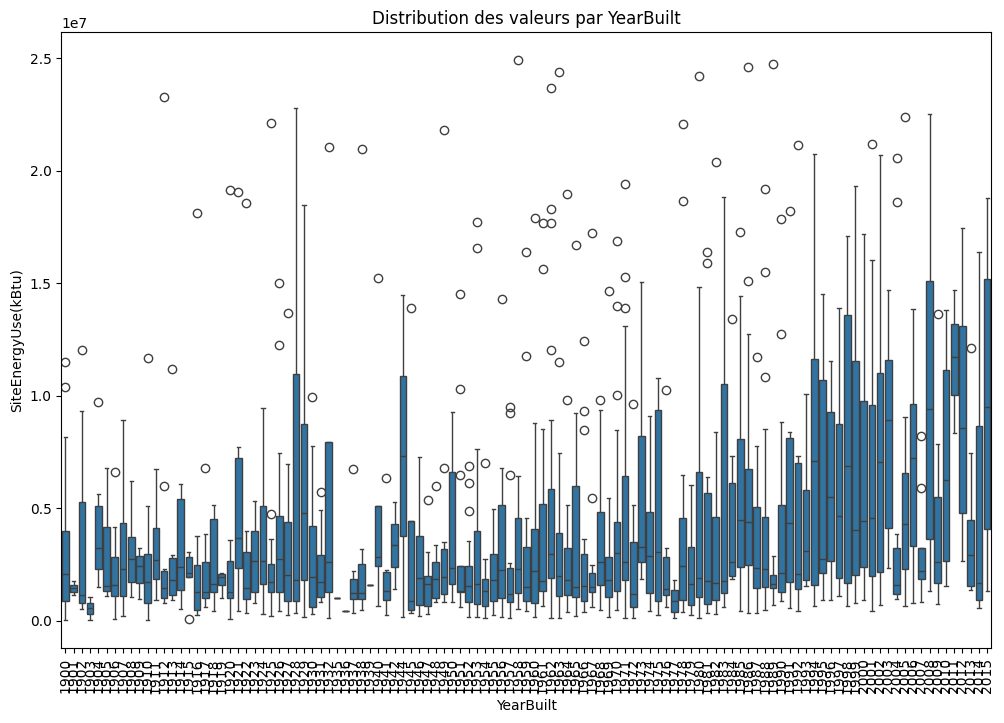

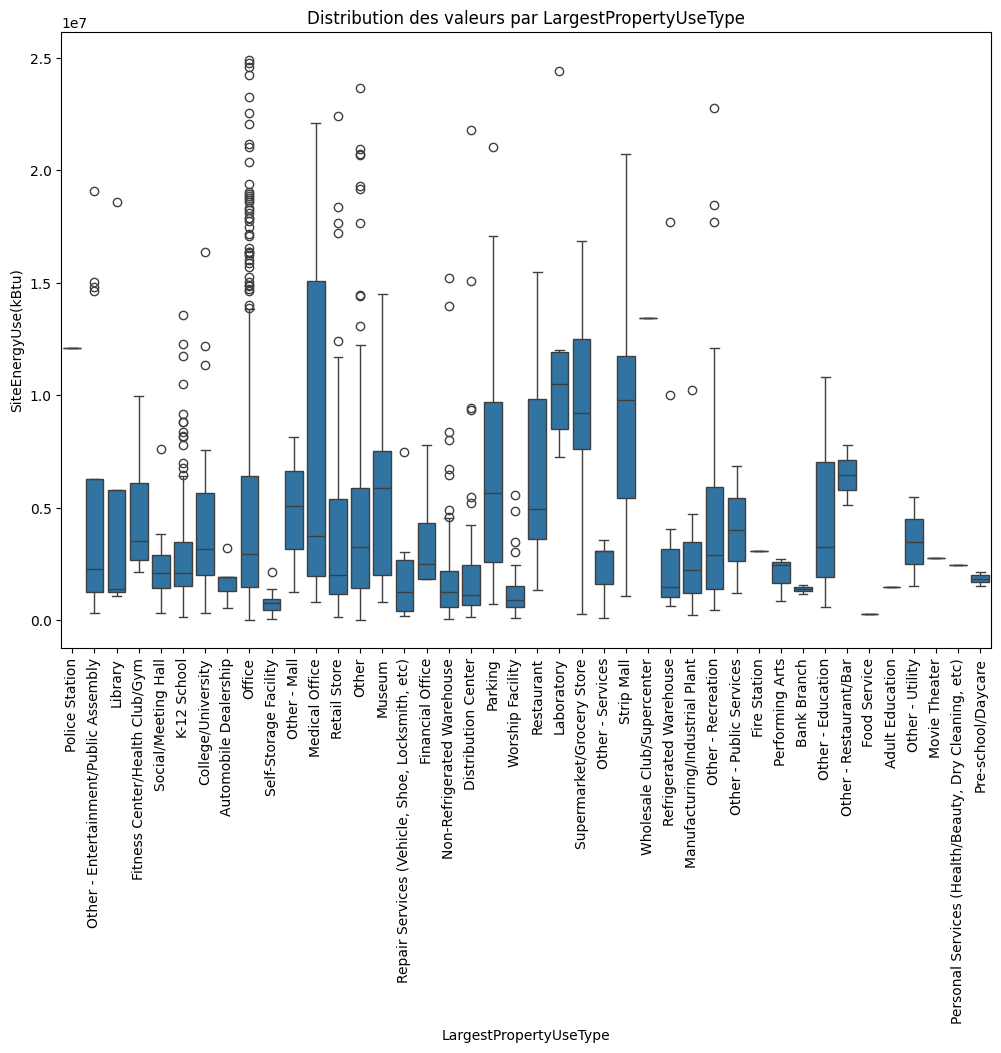

In [55]:
for quali in liste_quali :
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=quali, y='SiteEnergyUse(kBtu)', data=building_consumption_clean)
    plt.title("Distribution des valeurs par "+ quali)
    plt.xticks(rotation=90)
    plt.show()

Analysons les corrélations entre la consommation et les données quantitatives.

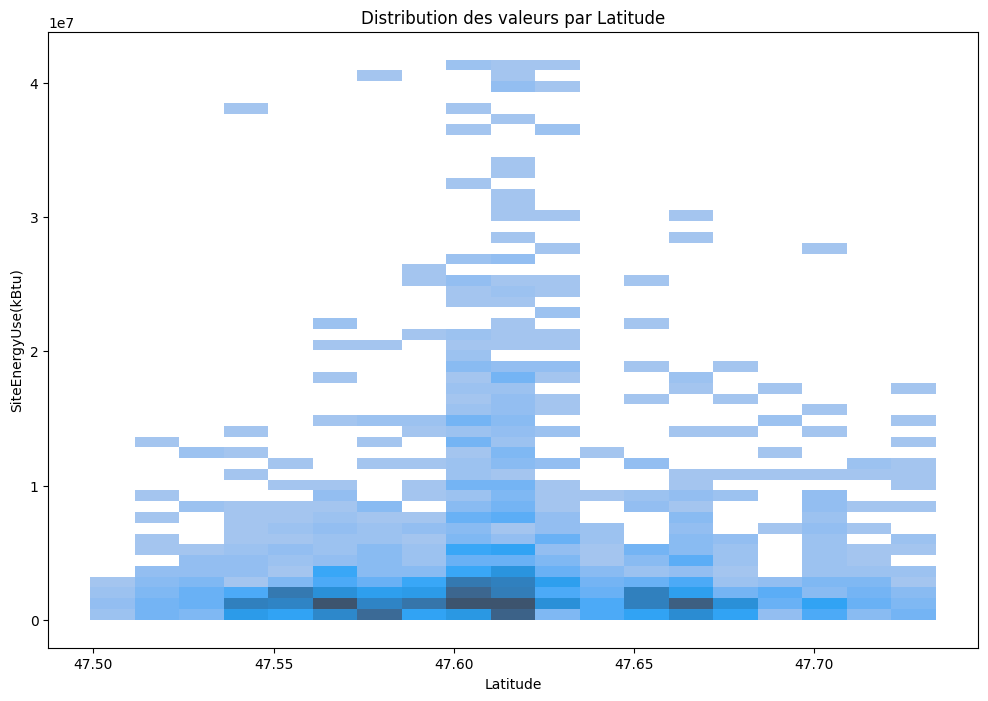

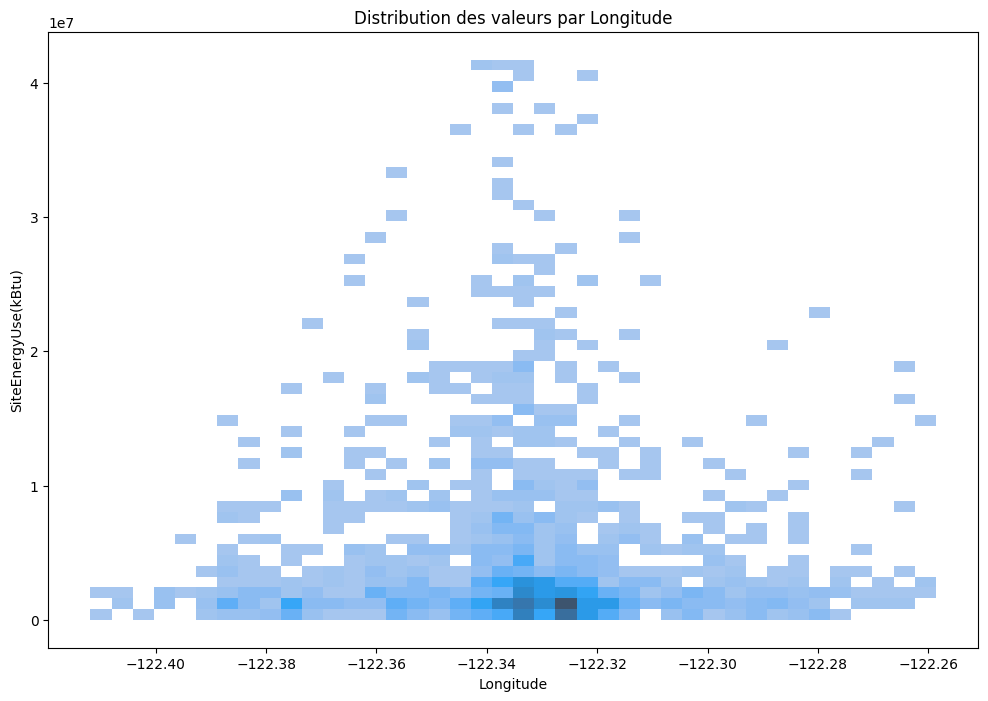

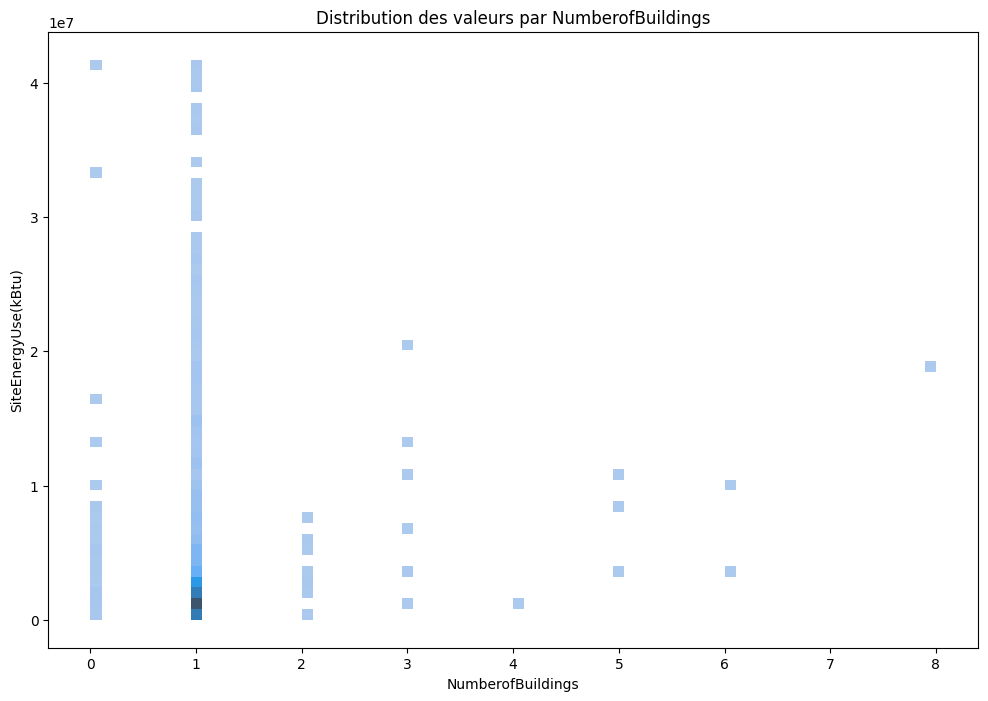

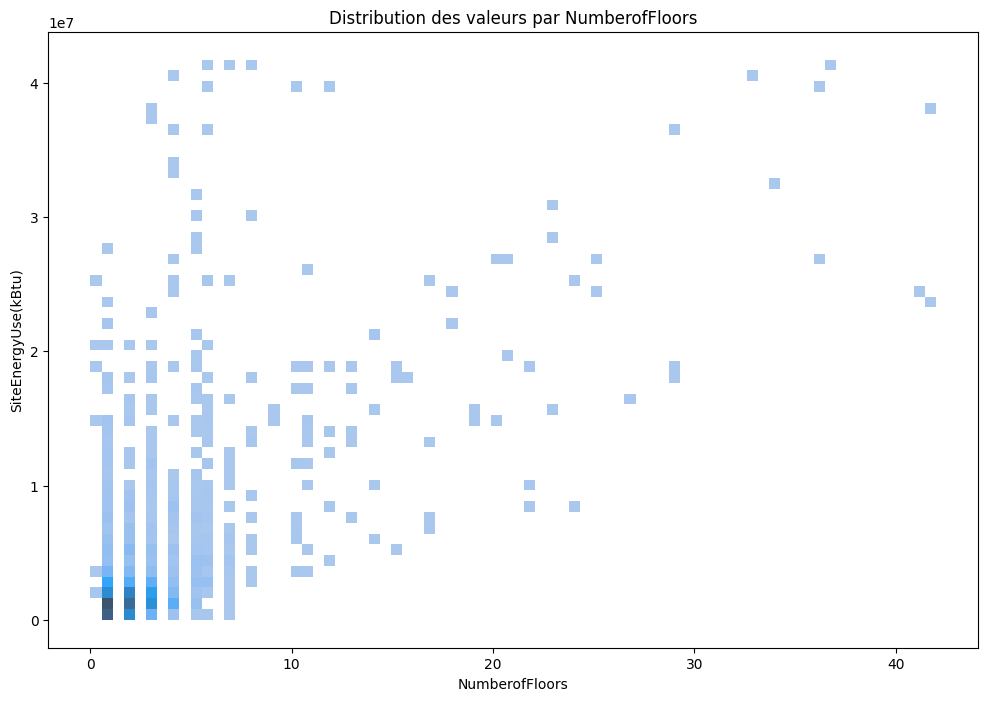

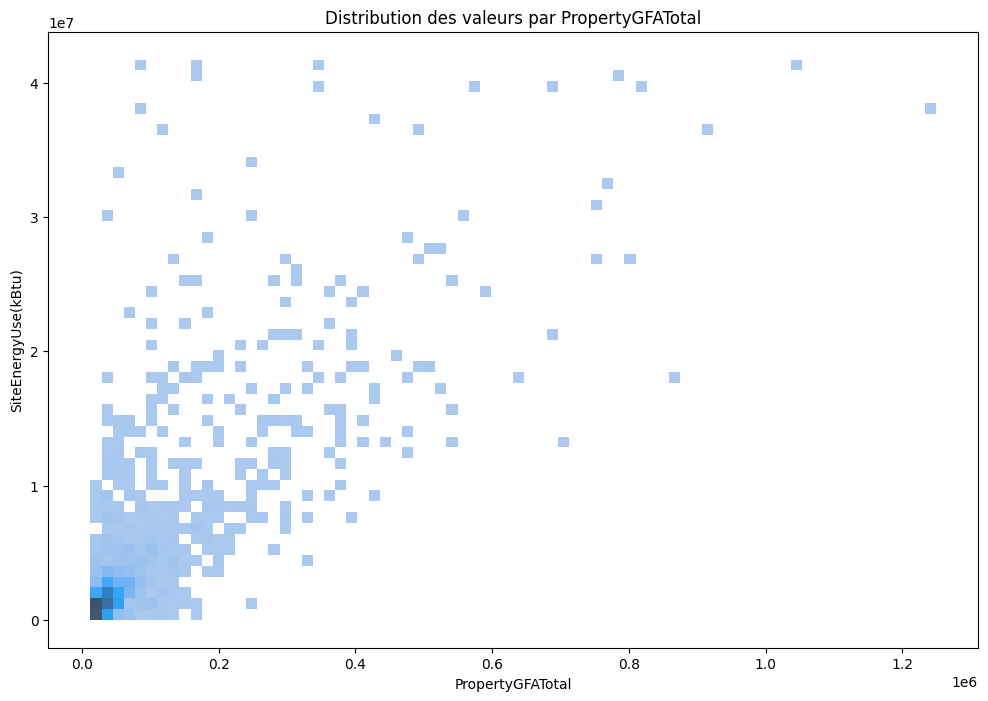

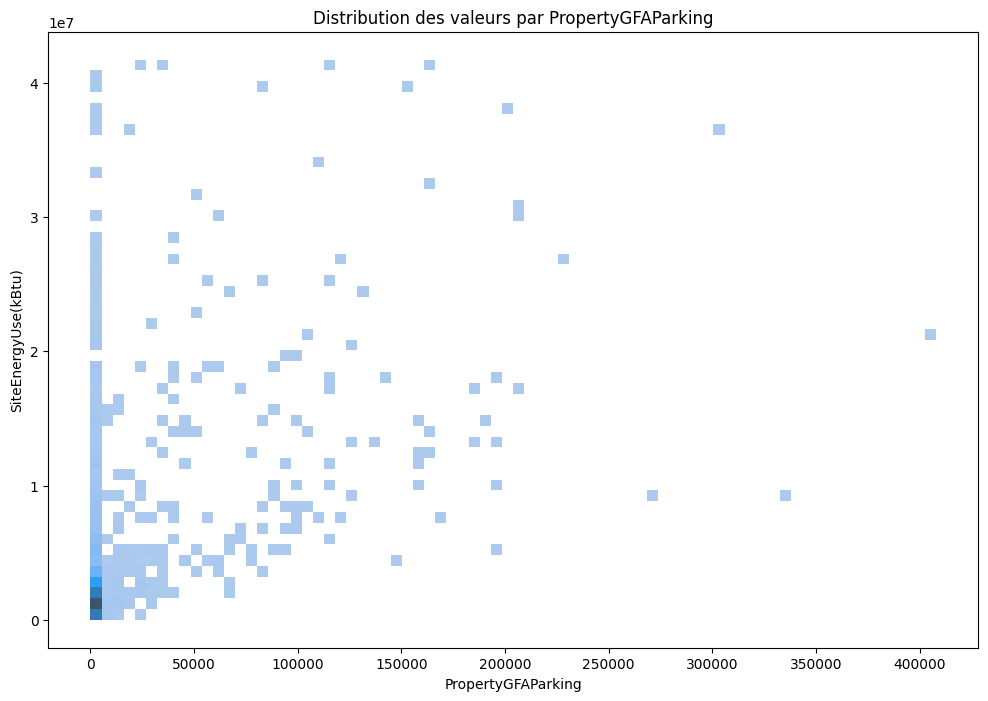

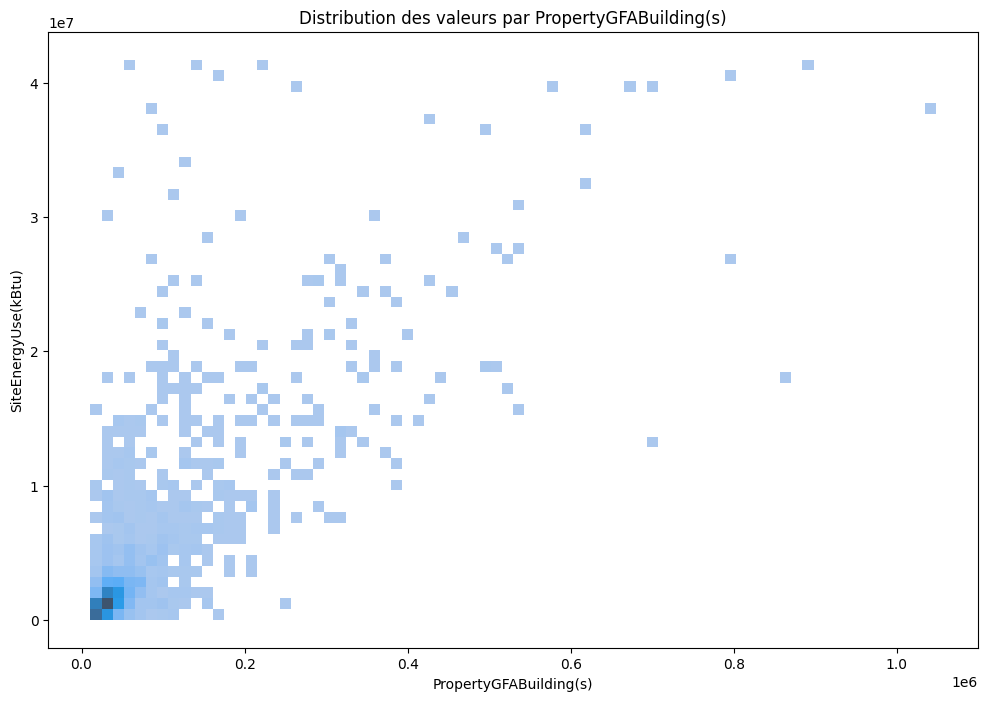

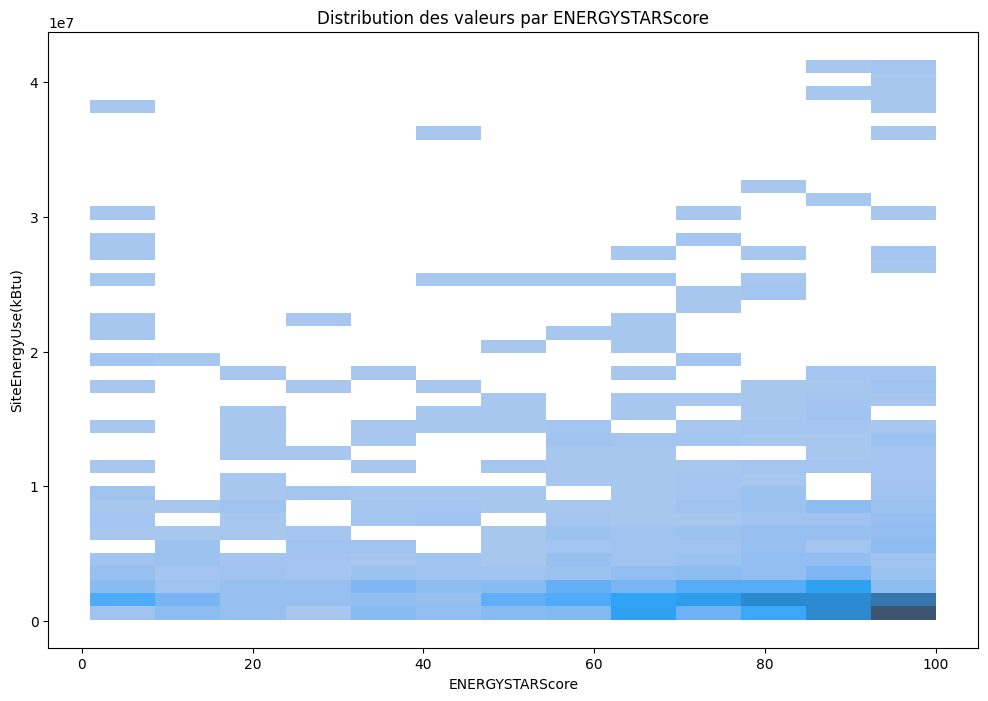

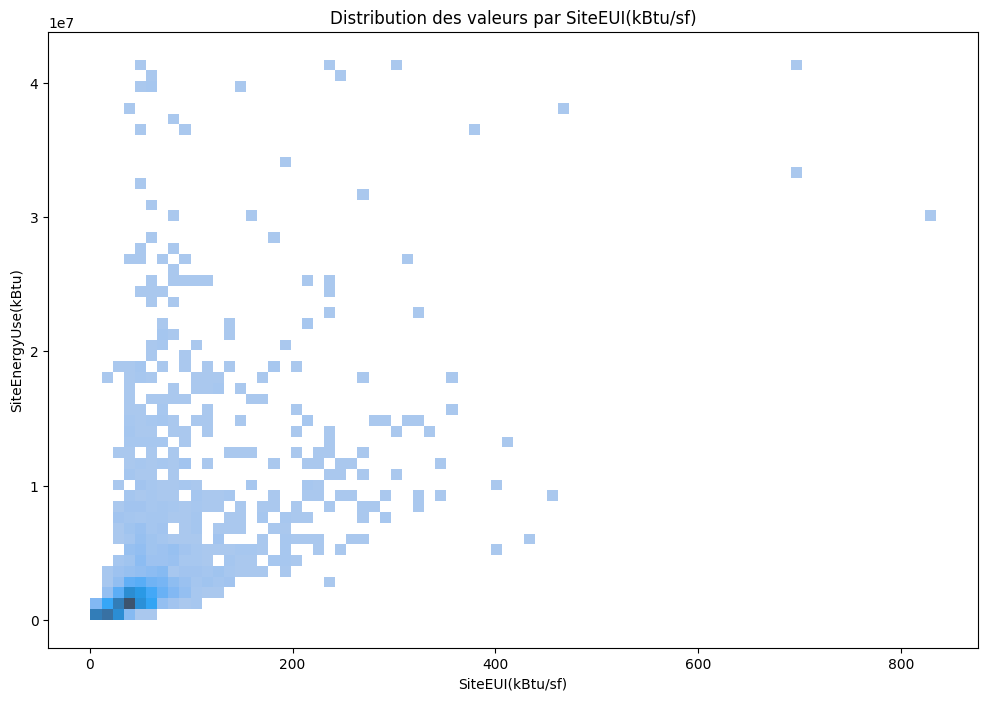

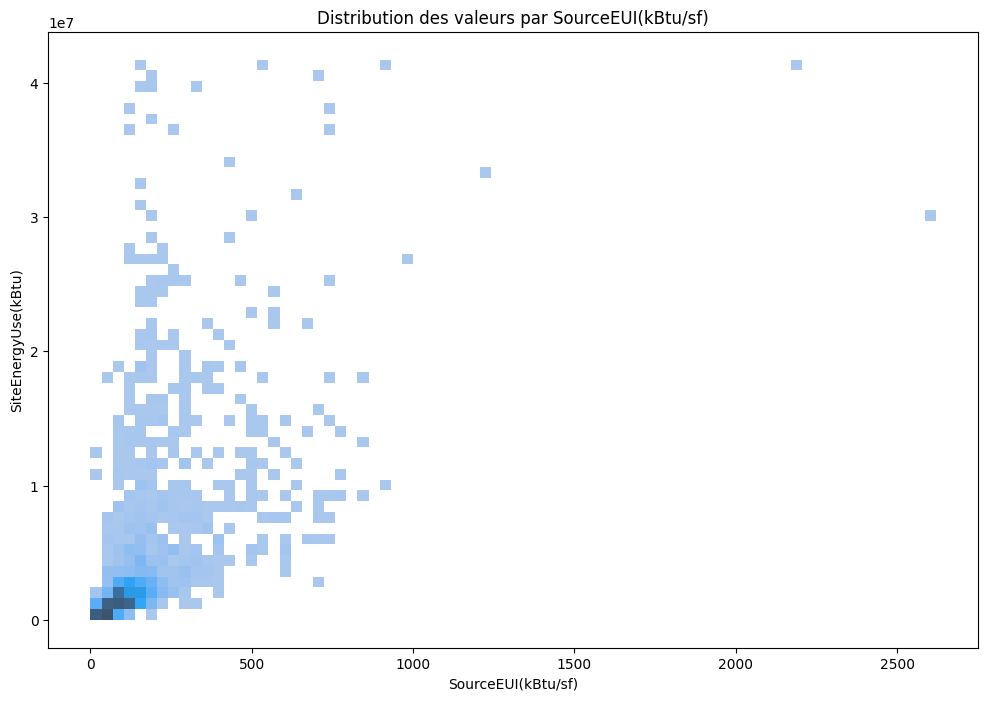

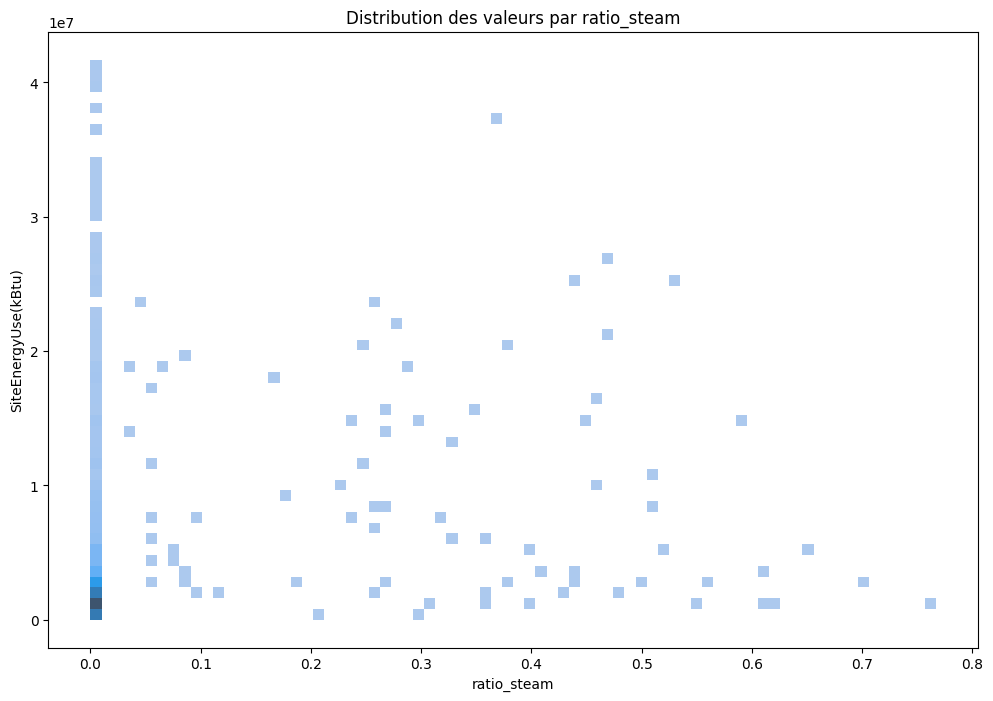

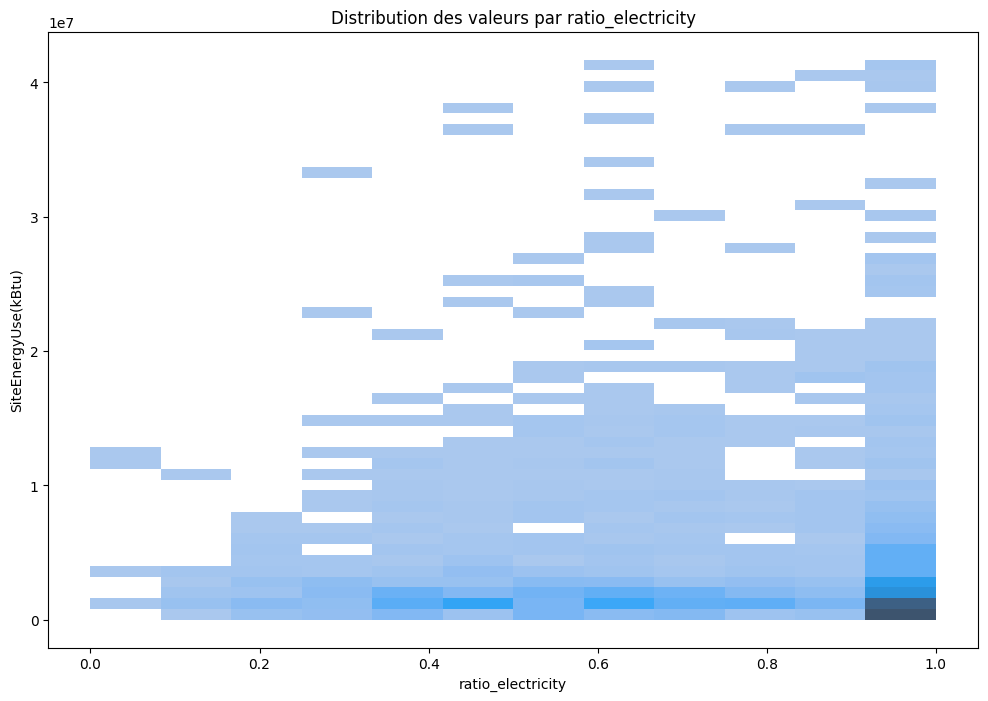

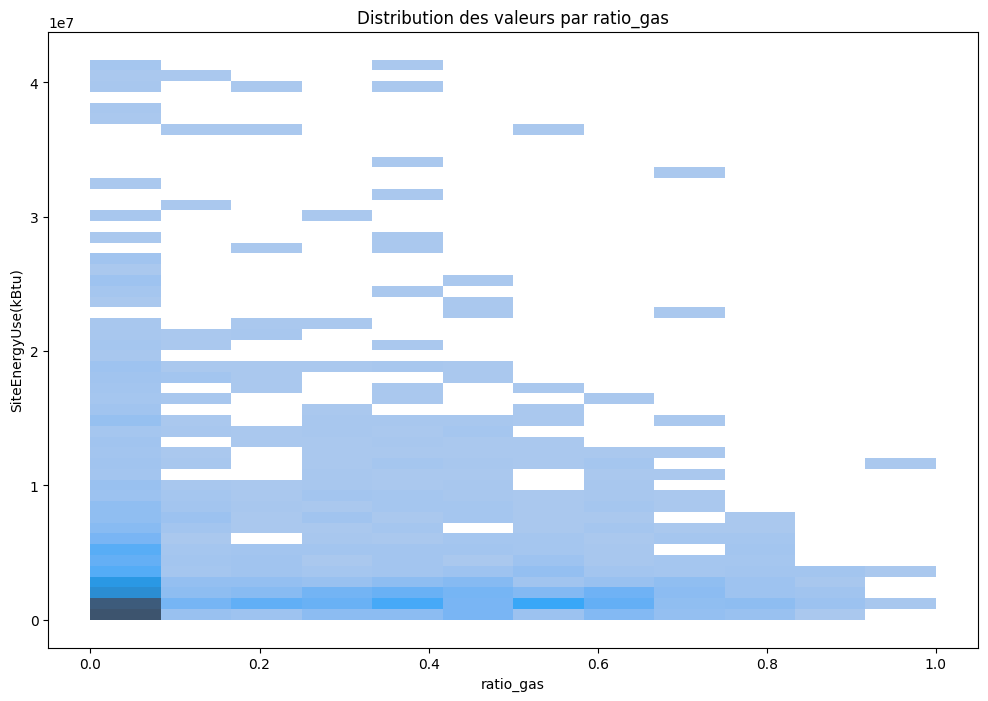

In [51]:
for quanti in liste_quanti :
    plt.figure(figsize=(12, 8))
    sns.histplot(x=quanti, y='SiteEnergyUse(kBtu)', data=building_consumption_clean)
    plt.title("Distribution des valeurs par "+ quanti)
    plt.show()

On peut déjà observer que certaines données n'ont aucune incidence particulière sur la consommation énergétique : Neighborhood, ENERGYSTARScore, YearBuilt, NumberofBuildings.

In [ ]:
building_consumption_clean.columns

# Modélisation 

### Import des modules 

In [ ]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

In [ ]:
# CODE FEATURE ENGINEERING

### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation.
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne.

In [ ]:
# CODE PREPARATION DES FEATURES

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [ ]:
# CODE COMPARAISON DES MODELES

### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn. 

In [ ]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE